# How-to: Create Codes

The QEC framework does not prescribe any particular way to create codes but it does follow some simple design philosophies and looks to provide a wide range of tools, methods and instructure to make creatings codes easier.

### Code Classs

Within the framework there are very few specific code classes. This is done for two primary reasons. The first is that changes in codes (due to failures or gauge fixing or other) can easy take a code out of a given class wheere class methods not longer work and we want to avoid having to continually check if a code is still within an given class or whether a given operation keeps a code inside the class. Second, since there is no simple code heirachy that could be used the number of code classes would be large, overlapping and difficult to manage. Instead the aim is to only use a few classes such as the `StabSubSystemCode` class which deal with stabilizer subsystem codes.

### Code Factories

A code factory is a general method of constructing a wide range of codes rather than any specific code, of group of codes. A code factory usually has many different configuration parameters and options. Code factories inherit from the `Factory` class. An example is the `TileCodeFactory` which builds codes based on cutting and gluing regions cut from tiles placed on a lattice.

### Code Builders

A code builder is a method of constructing specific codes or groups of codes. Usually, the number of configuration parameters is small the builder is relatively easy to use. Code builders often utilize a specialize configured code factory but may not. For example the code builders `TriangularColorCodeBuilder` and `HeavyHexCodeBuilder` builder classes use the `TileCodeFactory` to build specific codes.

### Code Library/Database

Qiskit-QEC contains a `CodeLibrarian` that manages various `CodeLibrary` instances that store a range of codes and their properties. This code database will eventually be hosted on a separate web server as the number of possible codes (even under local Clifford and permutation equivalance) grows very quickly. This database is meant to be analogous to GAP's small group database or Sloan's encyclopedia of integer sequences. 

## Creating Codes

There are many ways to create codes using the framework. These include

1. Creating a symplectic matrix
2. Providing the stabilizer/gauge generators as strings
3. Loading a code via the codebase libraries
4. Configuring and running a TileCodeFactory
5. Configuring and running a specific CodeBuilder
6. Writing a custom code class

### Creating a symplectic matrix

We first consider creating the 7-qubit Steane/color code:

TODO: Add image of a 7-qubit Steane code


In [ ]:
import numpy as np
from qiskit_qec.structures.gauge import GaugeGroup
from qiskit_qec.operators.pauli_list import PauliList
from qiskit_qec.codes.stabsubsystemcodes import StabSubSystemCode

# Create the 7-qubit Steane/color code
matrix = np.array(
    [
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
    ]
)

generators = PauliList(matrix)
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)
code.generators

### Providing the stabilizer/gauge generators as strings

Codes can also be created by given a set of Pauli genertors described by strings.

In [2]:
# The default Pauli/PauliList class reads product sytnax Paulis from right-to-left
# So IIXX is the Pauli X0X1
generators = PauliList(["IIIXXXX", "IIIZZZZ", "IXXXIXI", "IZZZIZI", "XIXIIXX", "ZIZIIZZ"])
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)

In [3]:
# Strings need not be in product syntax but can be an many forms including index syntax
generators = PauliList(["X0X1X2X3", "Z0Z1Z2Z3", "X1X3X4X5", "Z1Z3Z4Z5", "X0X1X4X6", "Z0Z1Z4Z6"])
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)

### Loading a code via the codebase libraries

Codes can also be loaded from a code database

In [6]:
# Start the CodeLibrarian
import qiskit_qec.codes.codebase as cb

# This will set the default output format to index format and read product syntax
# Pauli strings from left-to-right
import qiskit_qec.utils.pauli_rep as pauli_rep
from qiskit_qec.operators.base_pauli import BasePauli

BasePauli.set_syntax(pauli_rep.INDEX_SYNTAX)
BasePauli.set_qubit_order("left-to-right")

# Load the code with n=5, k=0 and the index = 1 then show its generators
code = cb.small_code(5, 0, 1)
code.gauge_group.generators

In [7]:
# Load the code with n=5, k=0 and index=4 but only fetch the information on it
codes = cb.small_code(5, 0, 4, info_only=True)
codes.info

[[5,0]]-4 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['Z1Z2', 'Z0Z4', 'Y1Y2X3', 'Z0Z1Z3', 'Y0X3Y4']
is_subsystem         : 1
index                : 4
code_type            : StabSubSystemCode
aut_group_size       : 32
is_triorthogonal     : 0
is_decomposable      : 0
weight_enumerator    : [1, 0, 2, 8, 13, 8]
is_css               : 1
uuid                 : 33f790cd-ab06-47fb-a2b3-057f38329942
is_degenerate        : 0
d                    : 2
is_gf4linear         : 0
k                    : 0
n                    : 5



In [23]:
# Load all (1) small codes info with n=5 and k=2 that are not CSS with d=2
codes = cb.all_small_codes(5, 2, is_css=False, info_only=True, d=2)
code.info

[[5,2]]-36 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['X1Z2Z3', 'Y0Y1X3', 'Z0Z1X2Z4']
logical_ops          : ['Z0Z1X3', 'Z2X4', 'Z0Z3', 'Z4']
is_subsystem         : 1
index                : 36
code_type            : StabSubSystemCode
aut_group_size       : 8
is_decomposable      : 0
weight_enumerator    : [1, 0, 0, 2, 3, 2]
is_css               : 0
uuid                 : 712505a9-19ed-4702-ba25-d2270317afaa
is_degenerate        : 0
d                    : 1
is_gf4linear         : 0
k                    : 2
n                    : 5



### Configuring and running a TileCodeFactory

The following example shows how to use the TileCodeFactory to build the Steane/color code or more generally the triangular color code. The follow example also shows how to see intermediate results when using a factory.

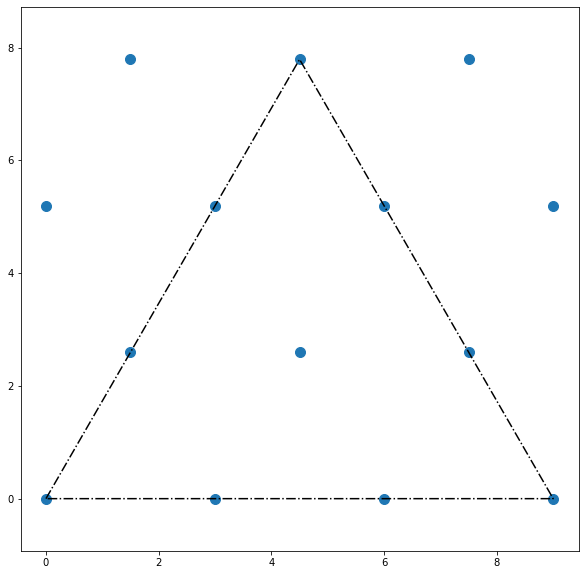

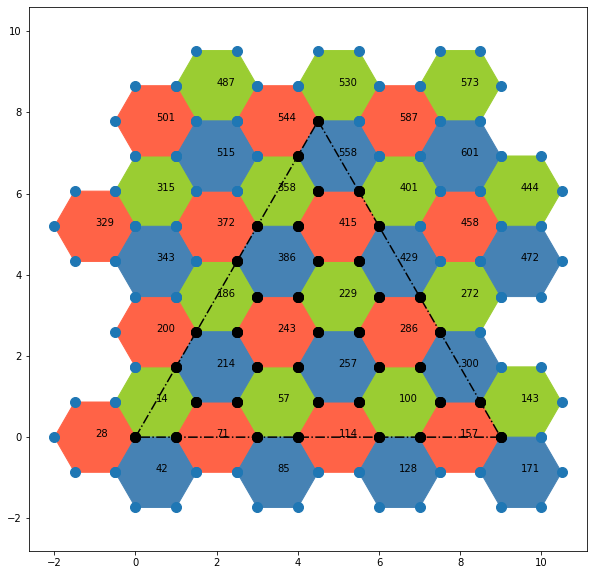

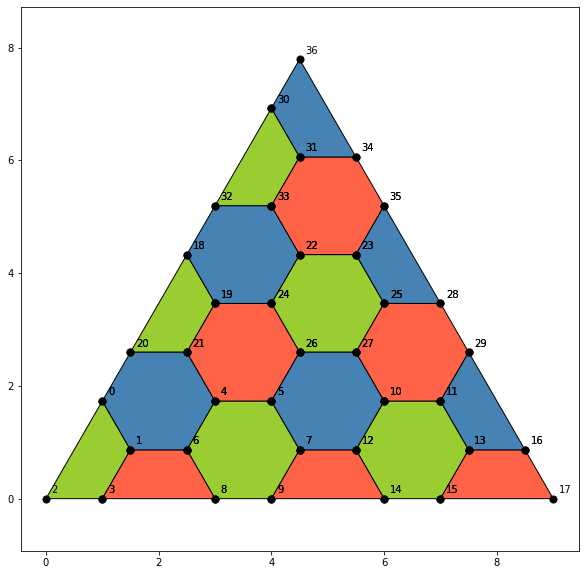

In [8]:
# Set distance
d = 7

# Load the appropriate tile: Hexagon Tile
from qiskit_qec.geometry.tiles.hexagontile import HexagonTile

# Load the Shape class to create a triangular cutter
from qiskit_qec.geometry.shape import Shape

# Load the TileCodeFactory
from qiskit_qec.codes.codefactory.tilecodefactory import TileCodeFactory

# Load the minifold to be tiled
from qiskit_qec.geometry.plane import Plane

# Load the lattive class to tile against
from qiskit_qec.geometry.lattice import Lattice

# Create a code factory
triangular_code_factory = TileCodeFactory()

## Set the factory parameters

# Set the manifold
manifold = Plane()

# Set the tile and tile parameters
tile = HexagonTile
tile_optype = "dXZ"  # Choose both X and Z stabilizers for each hexagon (predefined setting)

# Set the lattice to tile
lattice = Lattice(u_vec=HexagonTile.u_vec, v_vec=HexagonTile.v_vec)

# Set the length of the sides of the triangular cutter
scale = 3 * (d - 1) / 2

# Define the set of points defining the triangle
points = [[0, 0], [scale * HexagonTile.h, scale * HexagonTile.r], [scale, 0]]

# Create the triangular cutter and cutter parameters
cutter = Shape(points=points)
on_boundary = True  # Choose to include points on (or very near to) the cutter boundary
boundary_strategy = "combine"  # Choose how to combine separate peices of cut gauge operators
levels = [4, 6]  # Only include weight 4 and 6 operators after cutter from tiling

# Set to display intermediate views to allow for correction configuration errors
show_face_colors = True  # As each face as two operators (X and Z) use face colors
show_inside = True  # Show which qubits are inside the cutter
lattice_view = True  # Show the lattice view
precut_tiling_view = True  # Show the tiling before cutting

# Configure the code factory
triangular_code_factory.set_parameters(
    manifold=manifold,
    tile=tile,
    lattice=lattice,
    cutter=cutter,
    on_boundary=on_boundary,
    boundary_strategy=boundary_strategy,
    levels=levels,
    tile_optype=tile_optype,
    show_face_colors=show_face_colors,
    show_inside=show_inside,
    lattice_view=lattice_view,
    precut_tiling_view=precut_tiling_view,
)

# Update the factory is_configure check. This is used since we
# directly updated the TileCodeFactory configuration instead of
# using the individual TileCodeFactory configuration methods.
triangular_code_factory.update_is_configure()

# Create the base triangular color code
code = triangular_code_factory.make_code()

# View the code produced, using face colors and who qubit_indexs
code.draw(face_colors=True, show_index=True)

### Configuring and running a specific CodeBuilder

The previous approach can be wrapped into a builder class. In this case
a triangular code code builder

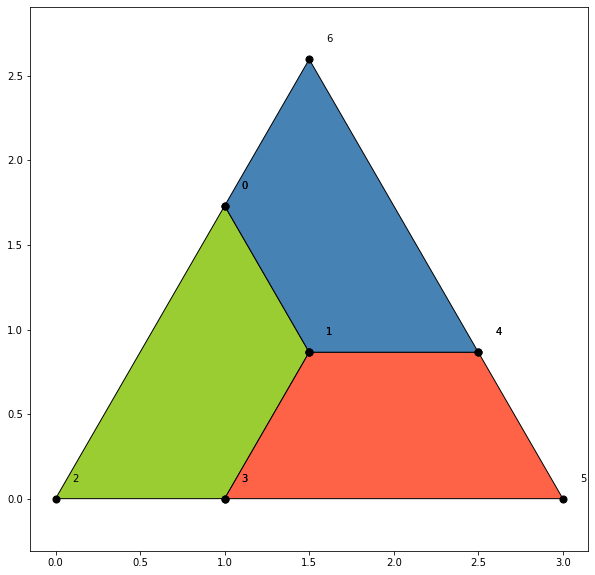

In [9]:
from qiskit_qec.codes.codebuilders.triangular_color_code_builder import TriangularColorCodeBuilder

code = TriangularColorCodeBuilder(d=3).build()
code.draw(face_colors=True, show_index=True)

Another builder is the surface code builder

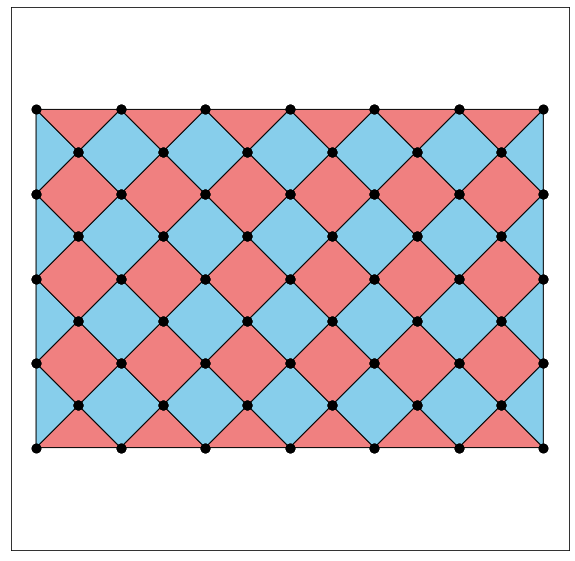

In [3]:
from qiskit_qec.codes.codebuilders.surface_code_builder import SurfaceCodeBuilder

code = SurfaceCodeBuilder(dx=5, dz=7).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

or the rotated surface code builder.

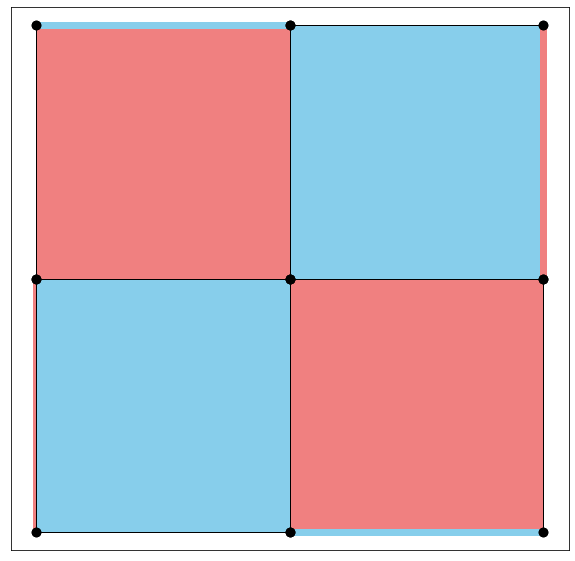

In [4]:
from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.codes.codebuilders.rotated_surface_code_builer import RotatedSurfaceCodeBuilder

code = RotatedSurfaceCodeBuilder(d=3, ul_op=Pauli("X")).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

Or the heavy hex code builder.

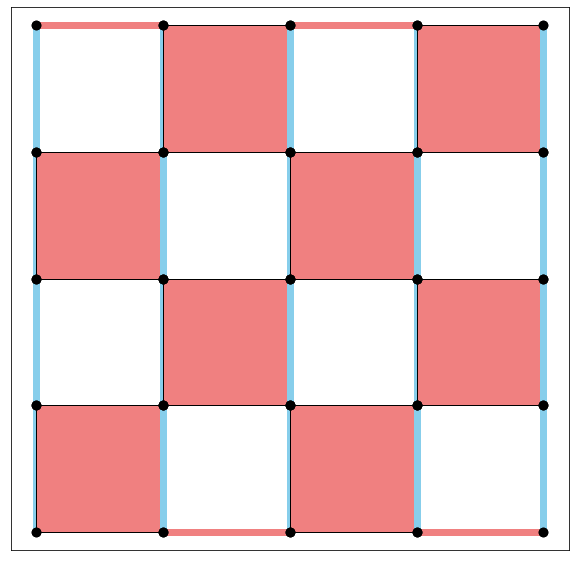

In [5]:
from qiskit_qec.codes.codebuilders.heavyhex_code_builder import HeavyHexCodeBuilder

code = HeavyHexCodeBuilder(d=5).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")